In [1]:
import os
os.chdir(r"C:\Users\3naza\OneDrive\Documents\ML\project")

In [2]:
import numpy as np
import cv2
from PIL import Image
from skimage import color
import torch.utils.data
from torchvision import transforms as T

from ColorDataset import ColorDataset
from utils import quantize_colors

In [3]:
transforms = T.Compose([
    T.ToPILImage(),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
dataset = ColorDataset("D:\\Flower\\jpg", 256, transforms)
dataset_test = ColorDataset("D:\\Flower\\jpg", 256, transforms)

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
split_ind = int(len(dataset) * .8)
dataset = torch.utils.data.Subset(dataset, indices[:split_ind])
dataset_test = torch.utils.data.Subset(dataset_test, indices[split_ind:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, drop_last=True)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, drop_last=False)

In [4]:
data_loader_test.__iter__().__next__()

entering the function
image opened
image resized (256, 256)
l shape: (256, 256, 1)
ab shape: (256, 256, 2)
starting quantizing...
finished quantizing...
gray image 1 (256, 256, 3)
gray image 2 (256, 256, 3)
gray image 3 (256, 256, 3)
gray image 4 (3, 256, 256)


{'l_channel': tensor([[[[ 6.8047,  6.6069,  7.5562,  ..., 45.4290, 45.4131, 44.2128],
           [ 7.7627,  6.5435,  6.6266,  ..., 45.4290, 45.4131, 45.4131],
           [ 8.7462,  7.9436,  6.6266,  ..., 45.8121, 46.2105, 44.6135],
           ...,
           [59.1441, 58.8143, 56.5580,  ..., 18.5054, 19.4176, 18.6713],
           [56.2005, 59.9729, 59.3871,  ..., 19.4083, 18.6513, 17.6677],
           [49.6632, 55.4046, 58.9454,  ..., 19.4083, 19.0394, 18.5149]]]]),
 'ab_channel': tensor([[[[-10.4755,  -8.8867,  -9.5707,  ..., -20.8449, -20.9884, -21.0465],
           [-11.3026,  -9.1709,  -8.7476,  ..., -20.8449, -20.9884, -20.9884],
           [-12.2289, -10.5415,  -8.7476,  ..., -20.9689, -20.9494, -21.0272],
           ...,
           [-25.3302, -27.5789, -27.4308,  ..., -17.8035, -17.7082, -16.5275],
           [-28.8117, -26.9453, -25.9765,  ..., -17.8033, -16.7288, -17.2797],
           [-29.0326, -27.1612, -26.3744,  ..., -17.8033, -17.1725, -17.7049]],
 
          [[  9.9993, 

In [5]:
data_sample = data_loader.dataset.dataset[1]

entering the function
image opened
image resized (256, 256)
l shape: (256, 256, 1)
ab shape: (256, 256, 2)
starting quantizing...
finished quantizing...
gray image 1 (256, 256, 3)
gray image 2 (256, 256, 3)
gray image 3 (256, 256, 3)
gray image 4 (3, 256, 256)


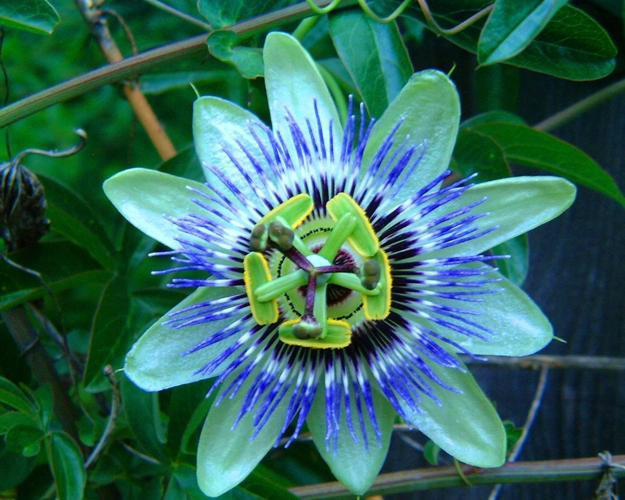

In [5]:
a = Image.open("D:\\Flower\\jpg\\image_00002.jpg")
a

Image with quantized colors to 313 bins

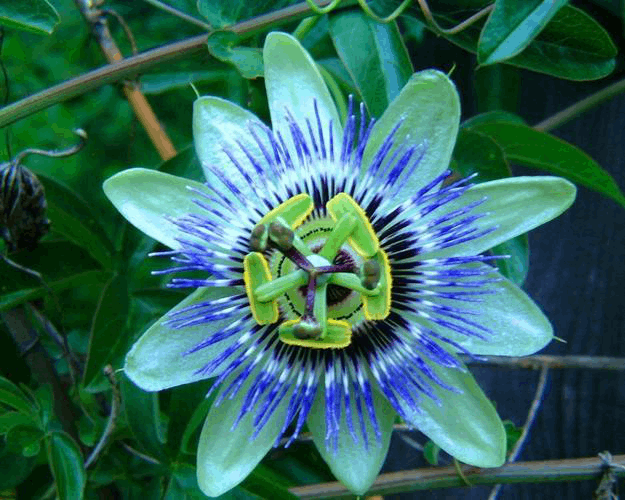

In [6]:
Image.fromarray(quantize_colors(a, 313).astype(np.uint8))

Converted to LAB color space. L channel

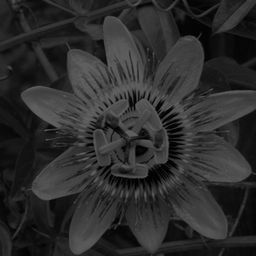

In [9]:
Image.fromarray(data_sample['l_channel'][0,:,:].astype(np.uint8))

A channel

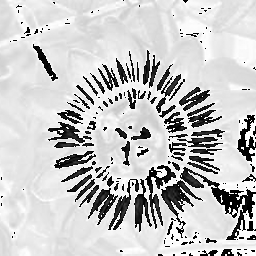

In [11]:
Image.fromarray(data_sample['ab_channel'][0,:,:].astype(np.uint8))

B channel

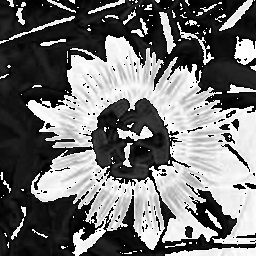

In [13]:
Image.fromarray(data_sample['ab_channel'][1,:,:].astype(np.uint8))

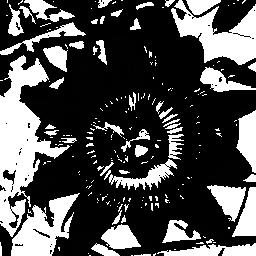

In [16]:
Image.fromarray(data_sample['resnet_inp'][0,:,:].astype(np.uint8))

In [4]:
from torch import optim

from torchvision import models
from MemoryNetwork import MemoryNetwork
from train import train
from TTL import TTL

resnet18 = models.resnet18(pretrained=True)
memnetwork = MemoryNetwork(5)
criterion = TTL()
optimizer = optim.Adam(resnet18.parameters(), lr=.0004)
train(data_loader, resnet18, memnetwork, criterion, optimizer)

entering the function
image opened
image resized (256, 256)
l shape: (256, 256, 1)
ab shape: (256, 256, 2)
starting quantizing...
finished quantizing...
gray image 1 (256, 256, 3)
gray image 2 (256, 256, 3)
gray image 3 (256, 256, 3)
gray image 4 (3, 256, 256)
entering the function
image opened
image resized (256, 256)
l shape: (256, 256, 1)
ab shape: (256, 256, 2)
starting quantizing...
finished quantizing...
gray image 1 (256, 256, 3)
gray image 2 (256, 256, 3)
gray image 3 (256, 256, 3)
gray image 4 (3, 256, 256)
torch.Size([2, 3, 256, 256])
get resnet out
get loss
tensor([[-0.3928, -0.0663, -1.3940,  ..., -1.7688,  1.1894,  0.1891],
        [-0.5921, -0.8989,  0.1189,  ...,  0.9033,  1.3508,  1.9216]],
       grad_fn=<AddmmBackward>) tensor([[201.7387,  28.7352],
        [112.1519,  78.1660]]) 0.7
zero grad
optim step
again resnet
update
q shape: torch.Size([1000])
K shape: torch.Size([1, 512, 512])
q shape: torch.Size([1000])
K shape: torch.Size([1, 512, 512])


MemoryError: Unable to allocate 1.95 GiB for an array with shape (1000, 262144) and data type int64